In [ ]:
# cv2.imread(filename. flags = None) -> retval
# flags:
# cv2.IMREAD_COLOR: BGR color로 읽기
# cv2.IMREAD_GRAYSCALE: 그레이 color로 읽기
# cv2.IMREAD_UNCHANGED: 파일 속성대로 읽기
# cv2.IMREAD_REDUCED_GRAYSCALE_2 
# cv2.IMREAD_REDUCED_COLOR_2 

# retval: numpy.ndarray로 반환

In [ ]:
import numpy as np
import cv2 # opencv-python which is an Open Source Computer Vision Library
import sys
import matplotlib.pyplot as plt # matplotlib.pyplot which provides a MATLAB-like plotting framework

def close_window():
    cv2.destroyAllWindows()  # Close the window
    cv2.waitKey(1)
    cv2.waitKey(1)
    
def ifNotExistExit(filename):
    if not filename:
        print('filename is None')
        sys.exit()

img = cv2.imread('./fig/mri_brain.jpeg', cv2.IMREAD_GRAYSCALE)

print(type(img)) # class numpy
print(img.shape) # bgr (rgb x)
print(img.dtype)

h, w = img.shape
print(f'height: {h}, width: {w}')

window_ = cv2.imshow('img', img)
while True:
    if cv2.waitKey(1000) & 0xFF == ord('q'):  # Press 'q' to close the window
        break
print('close window before exit')
close_window() # Close the window

<class 'numpy.ndarray'>
(630, 630)
uint8
height: 630, width: 630


2025-03-20 18:44:28.865 python[61978:8330844] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-20 18:44:28.865 python[61978:8330844] +[IMKInputSession subclass]: chose IMKInputSession_Modern


close window before exit


: 

#  이미지 창 사용하기

In [ ]:
img = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR)

if img is None:
    print('Image load failed')
    sys.exit()

cv2.imshow('dog', img)
cv2.waitKey() # wait until any key is pressed
close_window() # Close the window

# Matplotlib를 사용하여 이미지 창을 사용하는 방법을 설명합니다.

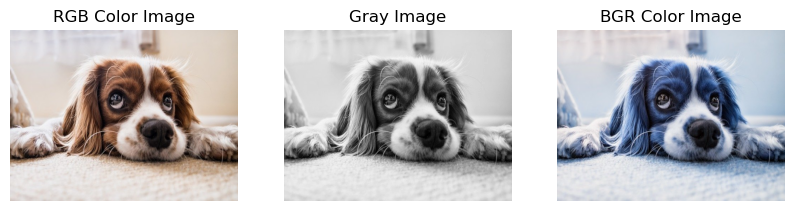

In [10]:
img = cv2.imread('./fig/dog.bmp', cv2.IMREAD_COLOR) # cv2.IMREAD_COLOR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # cv2.COLOR_BGR2RGB
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # cv2.COLOR_BGR2GRAY

if img is None:
    print('Image load failed')
    sys.exit()
    
cv2.namedWindow('dog', cv2.WINDOW_AUTOSIZE)
cv2.imshow('dog', img)

# matplotlib로 이미지 출력
# plt.imshow(img_gray, cmap="gray") # img_rgb, img
# plt.axis('off')
# plt.show()

plt.figure(figsize=(10, 5)) # 가로 10, 세로 5
plt.subplot(131) # 1행 3열의 첫번째
plt.axis('off')
plt.imshow(img_rgb)
plt.title('RGB Color Image')

plt.subplot(132) # 1행 3열의 두번째
plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')

plt.subplot(133) # 1행 3열의 세번째
plt.axis('off')
plt.imshow(img)
plt.title('BGR Color Image')

plt.show()

while True:
    if cv2.waitKey(1000) & 0xFF == ord('q'):
        break
    
close_window() # Close the window

## 온라인 이미지 다운로드

In [20]:
from urllib import request
from PIL import Image
import io

try: 
    url = "https://media.cnn.com/api/v1/images/stellar/prod/gettyimages-1225589833.jpg?c=original"
    source = request.urlopen(url).read()
    
    # MARK: - np.array로 변환
    image = np.array(bytearray(source), dtype = np.uint8)
    print("image shape = ", image.shape) # (101968,)

    # MARK: - cv2.imdecode로 이미지 변환
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    cv2.imwrite("Cherry blossom.png", image) # 이미지 저장 at the local directory
    cv2.imshow("Cherry blossom", image)

    img_pil = Image.open(io.BytesIO(source))
    img_pil.show()
    
    cv2.waitKey()
    close_window()
except:
    print("URL Error")
    sys.exit()
 


image shape =  (778432,)


## 영상의 픽셀값 참조

In [22]:
img = cv2.imread('./fig/dog.bmp')

if img is None:
    print('Image load failed')
    sys.exit()

# get the pixel value at the center of the image
x = img.shape[1] // 2
y = img.shape[0] // 2
print(f'center pixel value: {img[y, x]}')


cv2.imshow('dog', img)
cv2.waitKey()
close_window() # Close the window
    

center pixel value: [ 0 14 40]


## Canvas를 사용하여 이미지 창 생성

In [ ]:
## OCR
img1 = np.zeros((600, 800, 3), dtype=np.uint8) # 600 x 800, 3 channel, black image. channel: BGR, channel 0: B, channel 1: G, channel 2: R

cv2.putText(img1, 'Hello, OpenCV', (20, 100), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 0)) # cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img1, 'Hello, OpenCV', (20, 200), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0)) # cv2.FONT_HERSHEY_PLAIN
cv2.putText(img1, 'Hello, OpenCV', (20, 300), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255)) # cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img1, 'Hello, OpenCV', (20, 400), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0)) # cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img1, 'Hello, OpenCV', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 2, (255, 0, 255)) # cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(img1, 'Hello, OpenCV', (20, 600), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 255, 255)) # cv2.FONT_HERSHEY_COMPLEX_SMALL
cv2.putText(img1, 'Hello, OpenCV', (20, 700), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (255, 255, 255)) # cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
cv2.putText(img1, 'Hello, OpenCV', (20, 800), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (128, 128, 128)) # cv2.FONT_HERSHEY_SCRIPT_COMPLEX

cv2.imshow('img1', img1) # Show the image
cv2.waitKey()
close_window() # Close the window

### 영상복사

In [27]:
img = cv2.imread('./fig/rose.jpg')

# img2 should be a copy of img
img2 = img.copy() # img2 is a copy of img (deep copy)
img[100:150, 200:300] = (0, 255, 255) # Change the color of img2 to yellow

try:
    if img is None:
        print('Image load failed')
        sys.exit()
except:
    print('Image load failed')
    sys.exit()

cv2.imshow('img', img)
cv2.imshow('img2', img2)

cv2.waitKey()
close_window() # Close the window

### 영상합성

In [30]:
img = cv2.imread('./fig/dog.bmp')

if img is None:
	ifNotExistExit(img)

# get a portion of the image
dog_eye = img[150:250, 250:500] # img[y1:y2, x1:x2]

# set color to the portion of the image with circle shape
cv2.circle(dog_eye, (50, 50), 30, (0, 0, 255), 2, cv2.LINE_AA) # cv2.circle(img, center, radius, color, thickness)

cv2.imshow('img', img)
cv2.imshow('dog_eye', dog_eye)

cv2.waitKey()
close_window() # Close the window


### 영상합성

In [ ]:
src = cv2.imread('./fig/airplane.bmp', cv2.IMREAD_COLOR)        # src image should be a color image
mask = cv2.imread('./fig/mask_plane.bmp', cv2.IMREAD_GRAYSCALE) # mask image should be a grayscale image
dst = cv2.imread('./fig/field.bmp', cv2.IMREAD_COLOR)           # dst image should be the same size as the src image

if src is None or mask is None or dst is None:
    print('Image load failed')
    sys.exit()
    
cv2.copyTo(src, mask, dst) # cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey() # wait until any key is pressed, user should press any key,'q' to close the window
close_window() # Close the window

: 